# DECAthlon

This is a novel approach to the famuos computer vision problem of inverse rendering of synthetic 3D avatars. The framework is based on the DECA model, as well as the FLAME model, a large face dataset (e.g CelebsA-dialog), an image enhancer network and a differentiable renderer(e.g pytorch3d). Specifically DECAthlon is an end-to-end detailed textured avatar enhancer, that results to improved synthetic 3D textured avatars.

## Dataset 
The 2 datasets, are composed of face images of various people and it can be used to train the DECAthlon pipeline. CelebA  consists of 202,599 face images of celebrities. On the other hand, VoxCeleb2 constists of video clips, sequences, youtube urls and audio of 6,112 celebrities.

### CelebA dataset
The dataset consists of celebrity face images from 6,000 celebrities and can be directly used for training (~200,000 images). The main website can be found [here](https://mmlab.ie.cuhk.edu.hk/projects/CelebA/CelebA_Dialog.html)

If dataset does not download, then do it manually, upload it to your Google Drive & unzip it under /content/drive/MyDrive/celebA

In [ ]:
## Dataset Download
!pip install --upgrade --no-cache-dir gdown==4.3.0
!gdown --no-cookies "https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.3.0-py3-none-any.whl size=14412 sha256=77d8c047b383f087bd93150447112fa6c0fab134529c333a6ad0cae7b3db6678
  Stored in directory: /tmp/pip-ephem-wheel-cache-yb5enj_7/wheels/fd/ce/f8/389eafb78bce55ea78740dfcafc3c9da6f5e70d25c0377610d
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM 



In [ ]:
### Mount to GDrive
from google.colab import drive
drive.mount('/content/drive')

# Unzip 
!unzip /content/drive/MyDrive/celebA/img_align_celeba.zip -d /content/celebA/
print("CelebA can be found under /content/celebA/")

Streaming output truncated to the last 5000 lines.
 extracting: /content/celebA/img_align_celeba/197601.jpg  
 extracting: /content/celebA/img_align_celeba/197602.jpg  
 extracting: /content/celebA/img_align_celeba/197603.jpg  
 extracting: /content/celebA/img_align_celeba/197604.jpg  
 extracting: /content/celebA/img_align_celeba/197605.jpg  
 extracting: /content/celebA/img_align_celeba/197606.jpg  
 extracting: /content/celebA/img_align_celeba/197607.jpg  
 extracting: /content/celebA/img_align_celeba/197608.jpg  
 extracting: /content/celebA/img_align_celeba/197609.jpg  
 extracting: /content/celebA/img_align_celeba/197610.jpg  
 extracting: /content/celebA/img_align_celeba/197611.jpg  
 extracting: /content/celebA/img_align_celeba/197612.jpg  
 extracting: /content/celebA/img_align_celeba/197613.jpg  
 extracting: /content/celebA/img_align_celeba/197614.jpg  
 extracting: /content/celebA/img_align_celeba/197615.jpg  
 extracting: /content/celebA/img_align_celeba/197616.jpg  
 extr

### VoxCeleb2 dataset
VoxCeleb2 contains over 1 million utterances for 6,112 celebrities and can be found [here](https://www.robots.ox.ac.uk/~vgg/data/voxceleb/vox2.html). 


In essense, these are video clips from short interviews or general youtube clips of celebrities. The frame number provided assumes that the video is saved at 25fps.
This means that for each subject, there are multiple available frames. Each video sequence need to be analyzed into its consituent frames for training.

Get the download credentials by applying [here](https://docs.google.com/forms/d/e/1FAIpQLSdQhpq2Be2CktaPhuadUMU7ZDJoQuRlFlzNO45xO-drWQ0AXA/viewform?fbzx=7440236747203254000) and change the **--user** and **--password** arguments below. (Does not work for now, hence just use the download link straight)

If dataset does not download, then do it manually, upload it to your Google Drive & unzip it under /content/drive/MyDrive/voxCeleb2

In [ ]:
# Redundant (error with repo)
#!git clone https://github.com/clovaai/voxceleb_trainer.git
#import os
#%cd voxceleb_trainer
#os.makedirs("./data", exist_ok=True)

#!python ./dataprep.py --save_path data --download --user "voxceleb1912"   --password  "0s42xuw6"
#!python ./dataprep.py --save_path data --extract
#!python ./dataprep.py --save_path data --convert

In [ ]:
## Dataset Download
import os
try:
  os.makedirs("content/drive/MyDrive/voxCeleb2", exist_ok=True)
except:
  #print("Creating folder voxCeleb2 in GoogleDrive")
  os.makedirs("content/drive/MyDrive/voxCeleb2", exist_ok=False)
  os.system("wget 'https://thor.robots.ox.ac.uk/~vgg/data/voxceleb/vox1a/vox2_test_mp4.zip -O /content/vox2_test_mp4.zip' ")
  os.system("unzip /content/vox2_test_mp4.zip -d /content/drive/MyDrive/voxCeleb2")

print("Dataset VoxCeleb2 can be found under /content/drive/MyDrive/voxCeleb2/")

Dataset VoxCeleb2 can be found under /content/drive/MyDrive/voxCeleb2/


## Model Pipeline
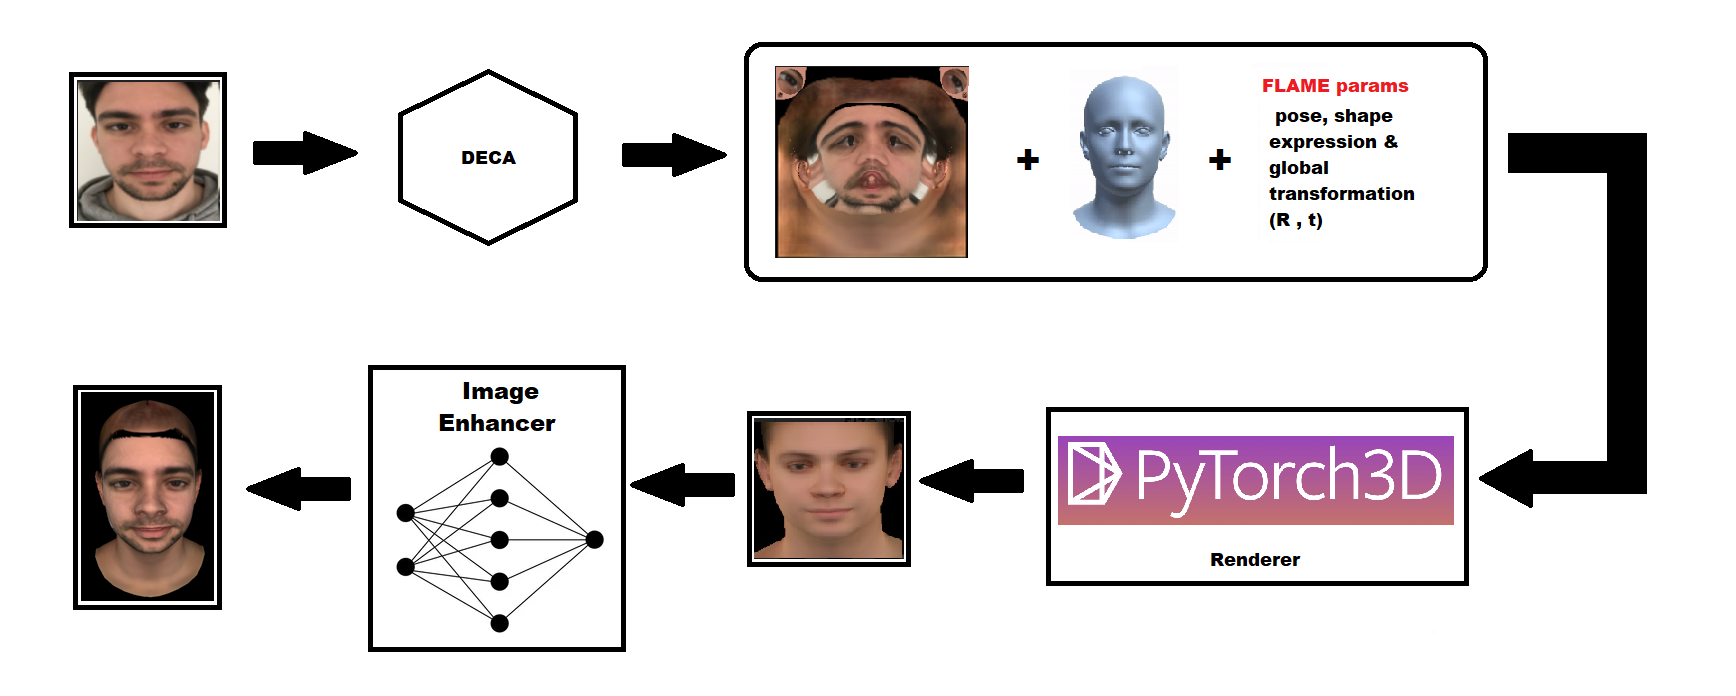


### DECA & FLAME Installation

#### Install DECA model repo

In [ ]:
### Install DECA model repo
!git clone https://github.com/YadiraF/DECA
%cd DECA

Cloning into 'DECA'...
remote: Enumerating objects: 378, done.
remote: Total 378 (delta 0), reused 0 (delta 0), pack-reused 378
Receiving objects: 100% (378/378), 22.97 MiB | 31.74 MiB/s, done.
Resolving deltas: 100% (150/150), done.
/content/BFM_to_FLAME/DECA


#### Install requirements

In [ ]:
### Install requirements
!pip install -r requirements.txt

#### Download FLAME model

Download FLAME model [here](https://flame.is.tue.mpg.de/download.php) 
(requires login) (FLAME 2020 model), unzip it and place it in Google Drive

In [ ]:
flame_model = '/content/drive/MyDrive/voca/FLAME2020.zip'
#!unzip [flame_model] -d /content/sample_data/
!unzip -o /content/drive/MyDrive/voca/FLAME2020.zip -d /content/sample_data/ #overwrite existing files
!cp /content/sample_data/generic_model.pkl /content/DECA/data

Archive:  /content/drive/MyDrive/voca/FLAME2020.zip
  inflating: /content/sample_data/female_model.pkl  
  inflating: /content/sample_data/generic_model.pkl  
  inflating: /content/sample_data/male_model.pkl  
  inflating: /content/sample_data/Readme.pdf  


#### Download DECA trained model

In [ ]:
!pip install gdown
import gdown
deca_url = 'https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje'
output = '/content/DECA/data/deca_model.tar'
gdown.download(deca_url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje
To: /content/DECA/data/deca_model.tar
100%|██████████| 434M/434M [00:03<00:00, 114MB/s]


'/content/DECA/data/deca_model.tar'

#### Get the npy file to enable textured 3D avatar generation

In [ ]:
%cd /content/
!pip install numpy==1.19.4
!pip install h5py==3.1.0
!pip install chumpy==0.70 
!pip install opencv-python==4.4.0.46
!git clone https://github.com/TimoBolkart/BFM_to_FLAME.git

/content
fatal: destination path 'BFM_to_FLAME' already exists and is not an empty directory.


In [ ]:
!wget -O /content/BFM_to_FLAME/data/mask_inpainting.npz http://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz

--2022-05-09 11:54:04--  http://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz
Resolving files.is.tue.mpg.de (files.is.tue.mpg.de)... 192.124.27.148
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz [following]
--2022-05-09 11:54:05--  https://files.is.tue.mpg.de/tbolkart/FLAME/mask_inpainting.npz
Connecting to files.is.tue.mpg.de (files.is.tue.mpg.de)|192.124.27.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78643654 (75M) [application/octet-stream]
Saving to: ‘/content/BFM_to_FLAME/data/mask_inpainting.npz’

/content/BFM_to_FLA 100%[===================>]  75.00M  23.6MB/s    in 3.2s    

2022-05-09 11:54:08 (23.6 MB/s) - ‘/content/BFM_to_FLAME/data/mask_inpainting.npz’ saved [78643654/78643654]



Download BFM 2017 model (i.e. 'model2017-1_bfm_nomouth.h5') [here](https://faces.dmi.unibas.ch/bfm/bfm2017.html) and place it under **/content/BFM_to_FLAME/model**

---
or just retrieve it from your personal Google Drive, under /content/drive/MyDrive

In [ ]:
%cd /content/BFM_to_FLAME/
# Copy the .h5 model from your Google Drive
!cp /content/drive/MyDrive/model2017-1_bfm_nomouth.h5 /content/BFM_to_FLAME/model/model2017-1_bfm_nomouth.h5
!python col_to_tex.py

/content/BFM_to_FLAME
Conversion started......
tcmalloc: large alloc 1251999744 bytes == 0x4ad58000 @  0x7f0b4cd70001 0x7f0b4109154f 0x7f0b410e1b08 0x7f0b410e5c07 0x7f0b41184063 0x593784 0x548c51 0x51566f 0x593dd7 0x5118f8 0x593dd7 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e 0x7f0b4c96bc87 0x5b621a
Conversion finished


In [ ]:
!cp /content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz /content/drive/MyDrive/FLAME_albedo_from_BFM.npz #store it also in Google Drive (for quick retrieval)
!cp /content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz /content/DECA/data/FLAME_albedo_from_BFM.npz

### Install Pytorch3D

In [ ]:
## Install Pytorch 3D
import os
import sys
import torch
need_pytorch3d=True
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.11.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  404k    0  404k    0     0  1094k      0 --:--:-- --:--:-- --:--:-- 8833k
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-v_6i67r9
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-v_6i67r9
  Running command git checkout -q 2bd65027ca5c3b87b77d4f05b8eacae58d8d106f
  Created wheel for pytorch3d: filename=pytorch3d-0.6.2-cp37-cp37m-linux_x86_64.whl size=21031694 sha256=b25dea20c94e5cc8f76913ce7f2d924826b854a3d4305d4a2c06ae5347c4489a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9a73z9s0/wheels/4c/03/f0/326bb241eb86a155a12f217c81e163fbba48424bb84fa22074
Successfully built pytorch3d


In [ ]:
import os
import torch
import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

# add path for demo utils functions 
import sys
import os
sys.path.append(os.path.abspath(''))

In [ ]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

--2022-05-09 12:35:27--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1608 (1.6K) [text/plain]
Saving to: ‘plot_image_grid.py’

plot_image_grid.py  100%[===================>]   1.57K  --.-KB/s    in 0s      

2022-05-09 12:35:27 (24.0 MB/s) - ‘plot_image_grid.py’ saved [1608/1608]



### Framework